In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modules.utils as tools
import sklearn

In [56]:
import pandas as pd
df_5 = pd.read_csv('processed_csv/B0005_processed.csv', index_col = 0)
df_5['remaining_cycles'] = len(df_5[df_5.capacity>1.4]) - (df_5.index+1)
df_6 = pd.read_csv('processed_csv/B0006_processed.csv', index_col = 0)
df_6['remaining_cycles'] = len(df_6[df_6.capacity>1.4]) - (df_6.index+1)
df_7 = pd.read_csv('processed_csv/B0007_processed.csv', index_col = 0)
df_7['remaining_cycles'] = len(df_7[df_7.capacity>1.4]) - (df_7.index+1)

In [39]:
df_5[df_5.remaining_cycles == 0]

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,max_temp_C,capacity,remaining_cycles
123,2540.235,40.815061,0.006484,2426.375,-0.000437,2216.687,29.935658,1.401204,0


In [57]:
df_5.drop(['max_temp_C'], axis=1, inplace=True)
df_6.drop(['max_temp_C'], axis=1, inplace=True)
df_7.drop(['max_temp_C'], axis=1, inplace=True)

In [58]:
df_5['cell'] = 5
df_6['cell'] = 6
df_7['cell'] = 7
df_all = pd.concat([df_5, df_6, df_7])
df_all.reset_index(inplace=True)
df_all.drop(["index"], axis=1, inplace=True)
df_all

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,remaining_cycles,cell
0,3366.781,38.982181,0.004352,3287.969,-0.000339,1006.094,1.856487,123,5
1,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,122,5
2,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,121,5
3,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,120,5
4,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,119,5
...,...,...,...,...,...,...,...,...,...
499,2617.109,40.741759,0.006586,2472.172,-0.000444,2325.594,1.406171,4,7
500,2617.297,41.009644,0.006669,2462.750,-0.000444,2318.640,1.406336,3,7
501,2606.547,40.805587,0.006603,2461.547,-0.000444,2276.906,1.400455,2,7
502,2645.328,40.925860,0.006213,2490.625,-0.000433,2287.109,1.421787,1,7


In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in SSS.split(df_all, df_all.cell):
    df_train = df_all.loc[train_index]
    df_test = df_all.loc[test_index]

In [63]:
df_train.cell.value_counts()/ len(df_train)

5    0.334988
7    0.332506
6    0.332506
Name: cell, dtype: float64

In [64]:
df_test.cell.value_counts()/ len(df_test)

7    0.336634
6    0.336634
5    0.326733
Name: cell, dtype: float64

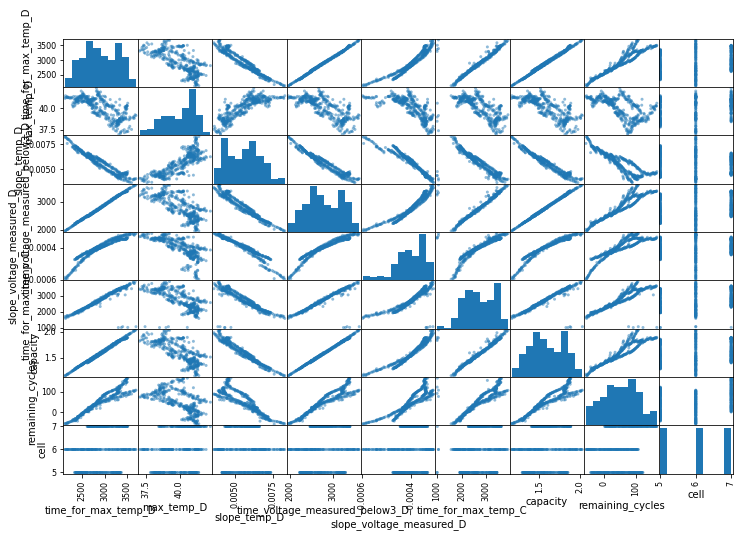

In [66]:
from pandas.plotting import scatter_matrix

attributes = df_train.columns
scatter_matrix(df_train[attributes], figsize=(12,8))
plt.show()


In [67]:
corr_matrix = df_train.corr()
corr_matrix

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,remaining_cycles,cell
time_for_max_temp_D,1.000000,-0.731980,-0.968844,0.998921,0.947156,0.876400,0.997018,0.948636,0.199831
max_temp_D,-0.731980,1.000000,0.827745,-0.749855,-0.729841,-0.684912,-0.765471,-0.587810,0.227064
slope_temp_D,-0.968844,0.827745,1.000000,-0.974693,-0.962513,-0.865624,-0.979713,-0.885379,-0.037301
time_voltage_measured_below3_D,0.998921,-0.749855,-0.974693,1.000000,0.951672,0.877614,0.999002,0.941924,0.161382
slope_voltage_measured_D,0.947156,-0.729841,-0.962513,0.951672,1.000000,0.844433,0.952459,0.887816,0.063670
time_for_max_temp_C,0.876400,-0.684912,-0.865624,0.877614,0.844433,1.000000,0.874000,0.843677,0.175118
capacity,0.997018,-0.765471,-0.979713,0.999002,0.952459,0.874000,1.000000,0.930950,0.131358
remaining_cycles,0.948636,-0.587810,-0.885379,0.941924,0.887816,0.843677,0.930950,1.000000,0.322308
cell,0.199831,0.227064,-0.037301,0.161382,0.063670,0.175118,0.131358,0.322308,1.000000


In [68]:
X_train = df_train.drop(['remaining_cycles', 'cell', 'capacity'], axis = 1)
y_train = df_train.remaining_cycles
X_test = df_test.drop(['remaining_cycles','cell', 'capacity'], axis = 1)
y_test = df_test.remaining_cycles

In [69]:
X_train

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C
460,2792.734,41.100340,0.006100,2647.750,-0.000416,2559.093
397,3164.344,40.057131,0.005176,3058.032,-0.000369,3166.391
329,2164.578,41.281339,0.008073,2005.203,-0.000582,1746.203
376,3321.844,39.312211,0.004682,3244.375,-0.000351,3403.422
342,3468.094,39.803818,0.004483,3367.781,-0.000344,3549.625
...,...,...,...,...,...,...
379,3312.078,38.611253,0.004553,3225.218,-0.000354,3378.141
145,2400.781,40.858744,0.007141,2277.000,-0.000460,1997.985
26,3292.609,38.111002,0.004343,3213.625,-0.000339,3385.047
364,3410.718,39.145312,0.004586,3330.265,-0.000345,3538.219


In [11]:
'''
X_5 = df_5.drop(['remaining_cycles'], axis=1)
y_5 = df_5.remaining_cycles
X_6 = df_6.drop(['remaining_cycles'], axis=1)
y_6 = df_6.remaining_cycles
X_7 = df_7.drop(['remaining_cycles'], axis=1)
y_7 = df_7.remaining_cycles
'''

In [14]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
sgd_reg = SGDRegressor(random_state=42)

lin_reg.fit(X_train_scaled, y_train)
sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [15]:
sgd_predictions = sgd_reg.predict(X_test_scaled)
lin_predictions = lin_reg.predict(X_test_scaled)

In [16]:
sgd_predictions

array([-15.9305587 , 104.75094019,   9.10399886,  96.9543951 ,
       -21.89089511, -32.69763327, -36.14034762,  83.32068413,
        15.23071743,  69.25943798,  99.0469196 , -28.2167371 ,
        -6.21441648,  81.7905967 ,  55.40917811,  29.47875371,
       101.38787626,   9.38288638,  43.72721821,  10.35029479,
       107.62592902,  98.3888032 , 110.86582112,  97.33649791,
       100.4555373 , 101.79467784,  36.4068973 ,  20.9124    ,
        44.6751063 ,  75.76307209,  90.82128683,  74.18103131,
       -27.32926564,   6.02975621,  53.42619539, -15.7938996 ,
       102.76832827,  29.20442452, -11.12302283, -22.8570719 ,
        38.5436886 ,   3.6774226 ])

In [19]:
from sklearn.metrics import mean_squared_error

rmse_lin = np.sqrt(mean_squared_error(lin_predictions, y_test))
rmse_sgd = np.sqrt(mean_squared_error(sgd_predictions, y_test))

In [20]:
print(rmse_lin, rmse_sgd)

6.348632370948952 7.197465315205734


In [30]:
df_6 = pd.read_csv('processed_csv/B0006_processed.csv', index_col = 0)
df_6['remaining_cycles'] = len(df_6[df_6.capacity>1.4]) - (df_6.index+1)

df_6[df_6.remaining_cycles == 1]

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,max_temp_C,capacity,remaining_cycles
107,2557.719,41.216881,0.006598,2426.375,-0.000463,2170.953,29.424227,1.404917,1


In [31]:
df_6.drop(['max_temp_C', 'capacity'], axis=1, inplace=True)
X_6 = df_6.drop(['remaining_cycles'], axis=1)
y_6 = df_6.remaining_cycles


In [32]:
X_6_scaled = scaler.transform(X_6)

In [33]:
sgd_predictions_6 = sgd_reg.predict(X_6_scaled)
lin_predictions_6 = lin_reg.predict(X_6_scaled)

In [34]:
sgd_predictions_6

array([148.63836289, 136.36084321, 135.72040062, 134.31097699,
       132.87971374, 134.11260591, 132.68354682, 129.07346731,
       127.16874985, 125.52908593, 124.89436144, 123.96417313,
       120.95732663, 120.24326778, 116.50719198, 113.6743961 ,
       113.35461881, 111.13077247, 110.69750323, 137.60504863,
       133.0528405 , 130.70464014, 127.06110754, 127.22602338,
       121.19872653, 117.93229586, 117.61173726, 115.553661  ,
       111.72504672, 113.50426165, 124.60275175, 126.72635892,
       112.14546852, 109.75480604, 106.17088148, 102.88402417,
       101.04005261,  96.8642696 ,  94.30143026,  91.30926276,
        89.95840393,  86.8390631 ,  91.33177116,  91.97912074,
        84.70229841,  80.07946984,  76.35848338, 108.89166857,
       103.36318407,  95.13287006,  86.60555536,  83.89391673,
        79.03253839,  75.9396535 ,  73.0461702 ,  69.30943951,
        66.5993836 ,  63.06074354,  61.55946563,  58.64629075,
        53.92771349,  50.99042874,  48.8511161 ,  51.01

In [35]:
rmse_lin = np.sqrt(mean_squared_error(lin_predictions_6, y_6))
rmse_sgd = np.sqrt(mean_squared_error(sgd_predictions_6, y_6))

In [36]:
print(rmse_lin, rmse_sgd)

26.13146010269372 21.408136208635693


In [101]:
from sklearn.ensemble import IsolationForest
import numpy as np
clf = IsolationForest(n_estimators=100, contamination=0.03, warm_start=True)
first_scores = clf.fit_predict(df_train[['time_for_max_temp_C', 'remaining_cycles']])  # fit the added trees 
clf.set_params(max_features=2)
second_scores = clf.fit_predict(df_train)
print(first_scores)
print(second_scores)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1

/home/hkqai/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:352: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print(precision_score(first_scores==-1, second_scores==-1))
print(recall_score(first_scores==-1, second_scores==-1))
print(f1_score(first_scores==-1, second_scores==-1))
conf_mx = confusion_matrix(first_scores==-1, second_scores==-1)
conf_mx

0.16666666666666666
0.15384615384615385
0.16


array([[380,  10],
       [ 11,   2]])